# Final Project, Part 1

Group members: Phoebe Ling, River Liu, Boyu Zhang, and Shaojun Zheng

## Dataset Information

***What is the "name" of the dataset?***  
"raw titles" data in "Netflix Movies and Series"  

***Where did you obtain it?***  
We obtain it from data.world, but its source is Kaggle.  

***Where can we obtain it? (i.e., URL)***  
https://data.world/gonzandrobles/netflix-movies-and-series/workspace/file?filename=raw_titles.csv   

**What is the license of the dataset?***  
The license is Creative Commons Zero (Public Domain). Therefore, we can reuse, modify, and refine it without limitation. This dataset can also be used in a commercial situation.  

***How big is it in file size and in items?***  
The whole dataset is 4.21MB, and we can directly use the URL to get the data without downloading the file and uploading it to GitHub.

We decide to use "raw titles" data in "Netflix Movies and Series" dataset. https://data.world/gonzandrobles/netflix-movies-and-series/workspace/file?filename=raw_titles.csv

## Explore the dataset and remove the null data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://query.data.world/s/7cdylzj6g2k4a7bahcloent6dhb3mf')

In [3]:
df

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [4]:
df.count()

id                      5806
title                   5805
type                    5806
release_year            5806
age_certification       3196
runtime                 5806
genres                  5806
production_countries    5806
seasons                 2047
imdb_id                 5362
imdb_score              5283
imdb_votes              5267
dtype: int64

In [5]:
df.isnull().sum()     # check the null value in each column

id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [6]:
# drop the raws which "title",'age_certification', or 'imdb_score' columns is null.
no_null = df.dropna(subset=['title', 'age_certification', 'imdb_score'])    

In [7]:
no_null.isnull().sum()

id                         0
title                      0
type                       0
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                 1328
imdb_id                    0
imdb_score                 0
imdb_votes                 9
dtype: int64

In [8]:
no_null.count()

id                      2998
title                   2998
type                    2998
release_year            2998
age_certification       2998
runtime                 2998
genres                  2998
production_countries    2998
seasons                 1670
imdb_id                 2998
imdb_score              2998
imdb_votes              2989
dtype: int64

In [9]:
# remove the raws which genres or production_countries is null
no_null = no_null[(no_null['genres'] != "[]") & (no_null['production_countries'] != "[]")]

In [10]:
no_null[no_null['genres'] == "[]"]

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


In [11]:
no_null[no_null['production_countries'] == "[]"]

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


In [12]:
no_null.count()

id                      2937
title                   2937
type                    2937
release_year            2937
age_certification       2937
runtime                 2937
genres                  2937
production_countries    2937
seasons                 1621
imdb_id                 2937
imdb_score              2937
imdb_votes              2928
dtype: int64

In [13]:
no_null.shape[0]

2937

In [14]:
no_null.shape[1]

12

In [15]:
no_null.count(numeric_only = 'True')

release_year    2937
runtime         2937
seasons         1621
imdb_score      2937
imdb_votes      2928
dtype: int64

## Characteristics of the dataset 

The dataset is about the movies and shows on Netflix and describes its metadata, including the issued year, age rating, genres, countries, IMDB score, and so on.   
There are 5806 rows in the original data and 2937 rows after I filter the null value of the title, age_certification, imdb_score, genres, and production_countries columns. There are 12 columns in the dataset, and 5 of the 12 columns are numeric data. In genres and production_countries columns, it uses the list-like string to represent the multiple values. 

## Simple plot

In [16]:
import bqplot
import ipywidgets
import matplotlib.pyplot as plt

In [17]:
count = no_null.groupby("release_year")['id'].count()

In [18]:
count.index

Int64Index([1964, 1966, 1967, 1969, 1971, 1972, 1973, 1975, 1976, 1977, 1979,
            1980, 1981, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='release_year')

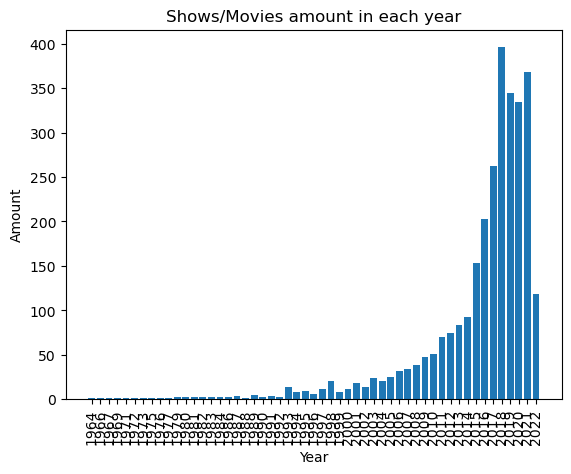

In [19]:
year = list(count.index)
number = list(count)
x = np.arange(len(year))
plt.bar(x, number)
plt.xticks(x, year)
plt.xlabel('Year')
plt.xticks(rotation='vertical')
plt.ylabel('Amount')
plt.title('Shows/Movies amount in each year')
plt.show()

I am interested in what kind of movie/show Netflix can give us. This plot shows the amounts of shows and movies each year in Netflix. We can see that Netflix provides more shows and movies after 2015, so people who like to see old movies may not suitable for Netflix.